# Front-prop: convolutions on simple patterns
Front-prop demo on simple patterns: a single fully-connected layer learning through inference.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.autonotebook import tqdm

import fp_modules as fp
from utils.fp_utils import sphere_rnd_gen, shanon_entropy_binned, plot_matrix
from utils.fp_datasets import SimplePatterns

/tmp/ipykernel_13966/4094291824.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# If there's a GPU available...
if torch.cuda.is_available():
    device = torch.device("cuda")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


Running on the CPU


In [ ]:
# Disable gradients in torch - Frontprop does not need them.
torch.set_grad_enabled(False)

In [4]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


## Learn simple patterns

In [5]:

def single_layer_frontprop_run(out_size, kernel_size, iterations, patterns_probs, noise_rate, device, reports_count=5):
    reports_interval = 0 if reports_count == 0 else int(iterations / reports_count)

    layer = fp.FpConv2d(1, out_size, kernel_size=kernel_size, device=device, t_decay=0.0001, w_boost=0.005)

    if reports_interval > 0:
        print("\n----------------\nRunning frontprop on following patterns:")
        plot_matrix(dims, *SimplePatterns.get_all_patterns())
        print(f"Pattern's probabilities:\n{patterns_probs}\n\n")

    with torch.no_grad():
        for i in range(iterations):

            input = SimplePatterns.get_simple_pattern(patterns_probs, noise=noise_rate) \
                .to(device).unsqueeze(0)

            input = input.unsqueeze(0)

            out = layer.forward(input)

            if reports_interval > 0 and i % reports_interval == 0:
                print(f"\n --- Iter #{i} - neurons weights --- ")
                plot_matrix((kernel_size, kernel_size), *([layer.weight[i] for i in range(neurons)]))
                # print("Layer outputs:")
                # print(out)
                # print("for input")
                # plot_matrix(DIMS, input)

    if reports_interval > 0:
        print(f"\n --- Final neurons weights --- ")
        plot_matrix((kernel_size, kernel_size), *([layer.weight[i] for i in range(neurons)]))

    return layer




----------------
Running frontprop on following patterns:


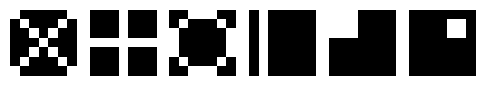

Pattern's probabilities:
[0.17 0.17 0.17 0.17 0.17 0.17]



 --- Iter #0 - neurons weights --- 


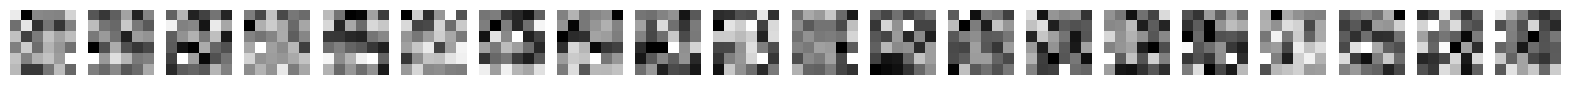


 --- Iter #2000 - neurons weights --- 


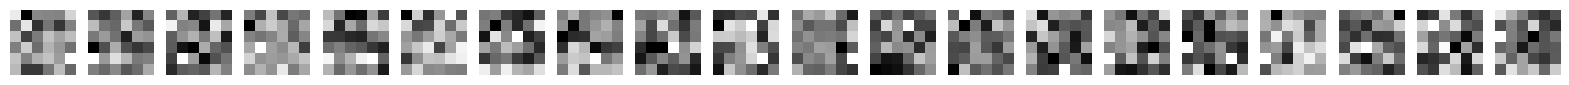


 --- Iter #4000 - neurons weights --- 


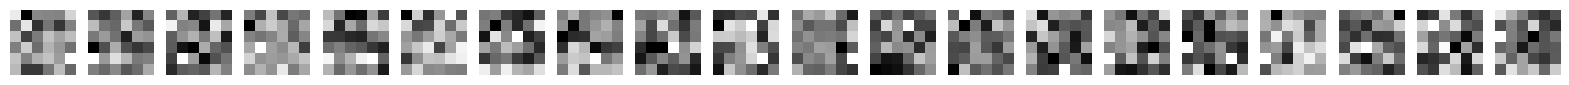


 --- Iter #6000 - neurons weights --- 


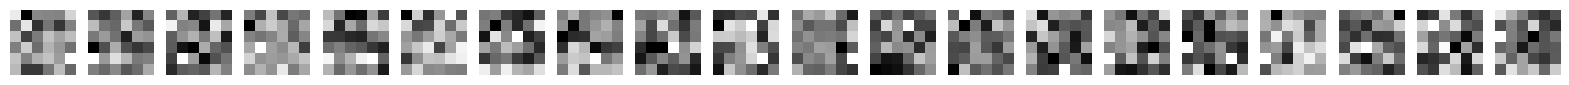


 --- Iter #8000 - neurons weights --- 


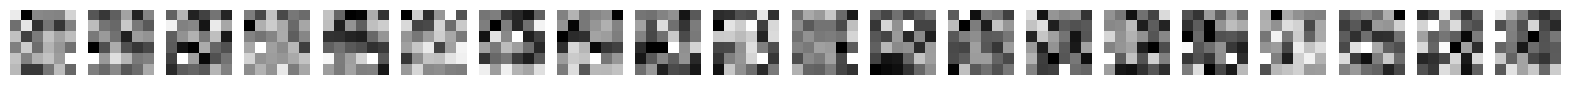


 --- Iter #10000 - neurons weights --- 


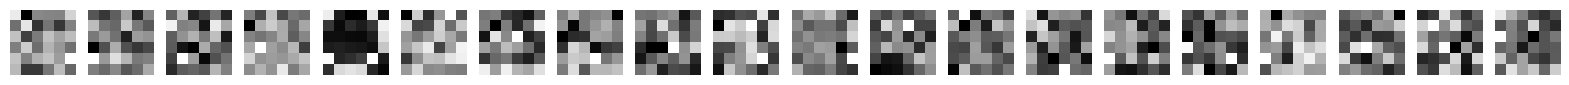


 --- Iter #12000 - neurons weights --- 


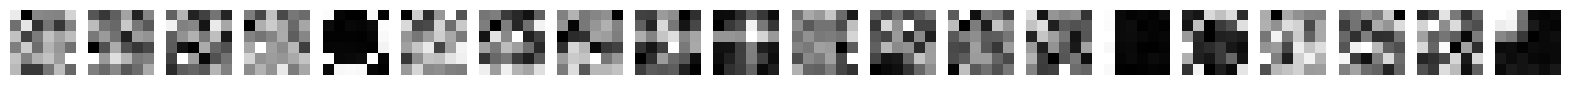


 --- Iter #14000 - neurons weights --- 


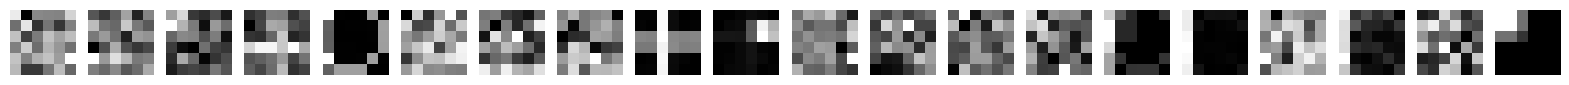


 --- Iter #16000 - neurons weights --- 


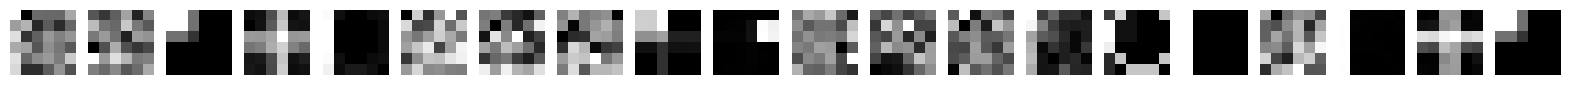


 --- Iter #18000 - neurons weights --- 


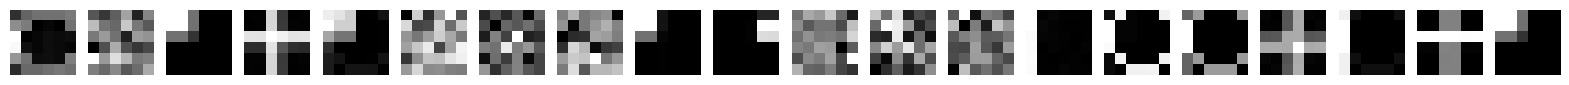


 --- Final neurons weights --- 


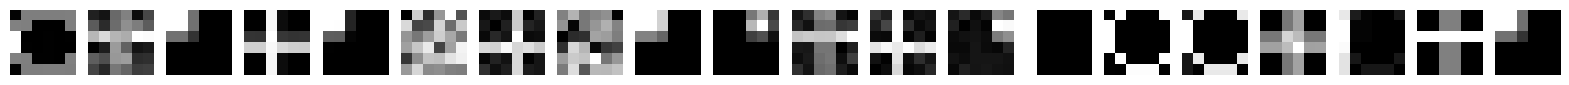

In [6]:
dims = SimplePatterns.get_pattern_dims()
iters = 20000  # 50000
neurons = 20
kernel_size = 6

# optionally apply small amount of gaussian noise to patterns
noise_rate = 0.0

# define patterns frequency weights (will be normalized to sum to 1)
# change these to see the impact of frequency on neurons specialisation
pattern_probs = [1.0] * SimplePatterns.get_all_patterns_count()  # [10,1,1,1,1,1]
pattern_probs /= np.sum(pattern_probs)

# train the Front-prop layer
layer = single_layer_frontprop_run(neurons,
                                   kernel_size,
                                   iters,
                                   pattern_probs,
                                   noise_rate,
                                   device, reports_count=10)

